# Converting depth images to point clouds using open3d
This notebook is the visual equivalent of the script `scripts/example.py`. 
Check the readme for more details.

In [240]:
from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

from pointcloud_tools import PointCloudCreator #, create_pcd_from_array, read_pcd, write_pcd

In [241]:
# point to the data dir
current_folder = Path(".").resolve()
base_dir = current_folder.parent / "data"

## Demo images
A single example of a tomato depth image is included. 

In [242]:
# point to the image files
image = "B_0328ab97"            #A_1a111b40 B_0328ab97 B_93dd57ad  D_b14ffae7

rgb_file = base_dir / "rgb" / f"{image}.png"
depth_file = base_dir / "depth" / f"{image}_depth.png"

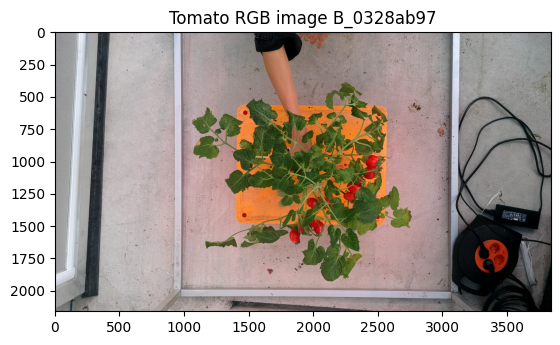

In [243]:
rgb_img = cv2.cvtColor(cv2.imread(str(rgb_file)), cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.title(f"Tomato RGB image {image}")
plt.show()

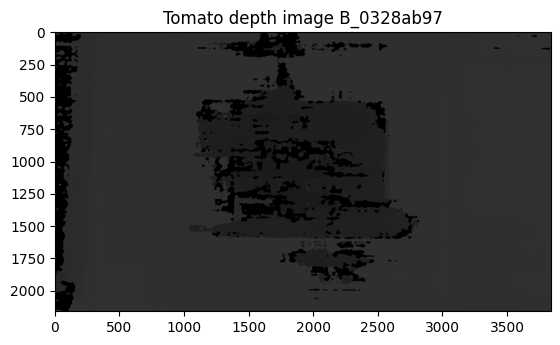

In [244]:
# The depth image is provided by the camera, and is a reconstruction from stero infra-red imaging.
depth_img = cv2.imread(str(depth_file), cv2.IMREAD_UNCHANGED)
plt.imshow(depth_img, cmap='gray')
plt.title(f"Tomato depth image {image}")
plt.show()

# Now we create a point cloud object

In [245]:
# init a point cloud creator with the camera configuration
point_cloud_creator = PointCloudCreator(conf_file=base_dir / "oak-d-s2-poe_conf.json", logger_level=100)

# create pcd object
pcd_object = point_cloud_creator.convert_depth_to_pcd(rgb_file=rgb_file, depth_file=depth_file)

## Quick visualization to validate the output.
More advanced visualization tools from open3d are available: 

https://www.open3d.org/docs/latest/tutorial/Basic/jupyter.html

Or use one of the many point cloud viewers.

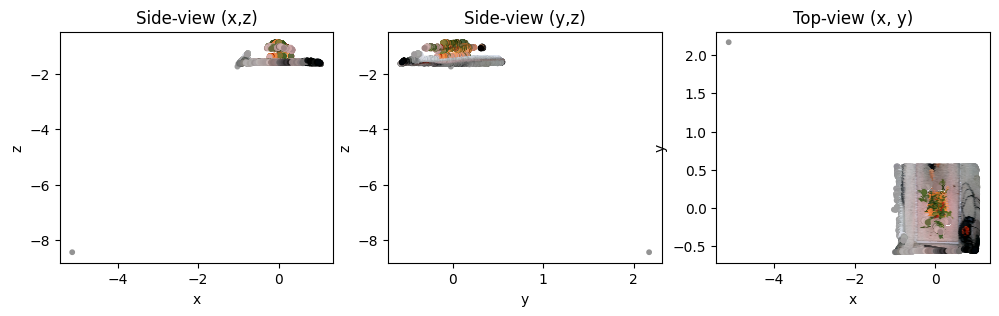

[[0.58039216 0.57647059 0.60392157]
 [0.82352941 0.85490196 0.88235294]
 [0.62352941 0.62352941 0.64313725]
 ...
 [0.0627451  0.07058824 0.06666667]
 [0.         0.00392157 0.        ]
 [0.00392157 0.01960784 0.03529412]]


In [246]:
# Extract points and colors
points = np.asarray(pcd_object.points)
colors = np.asarray(pcd_object.colors)

# downsample to make the plotting faster

# use -y because the pixel coordinates differs from the matrix coordinate system
# use -z because the camera is facing downwards
x = copy.deepcopy(points[range(0, len(points), 100), 0])
y = copy.deepcopy(-points[range(0, len(points), 100), 1])
z = copy.deepcopy(-points[range(0, len(points), 100), 2]) 
c = copy.deepcopy(colors[range(0, len(points), 100), :])

fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x, z, c=c, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')

axs[1].scatter(y, z, c=c, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x, y, c=c, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')

plt.show()

print(c)

In [259]:
height_limit = -0.75
ground_level = -1.04

# filter out the points that are below the ground level
mask = z > ground_level
#mask = z < height_limit

#points_filtered = points[mask]
x_ground_filtered = x[mask]
y_ground_filtered = y[mask]
z_ground_filtered = z[mask]
c_ground_filtered = c[mask]

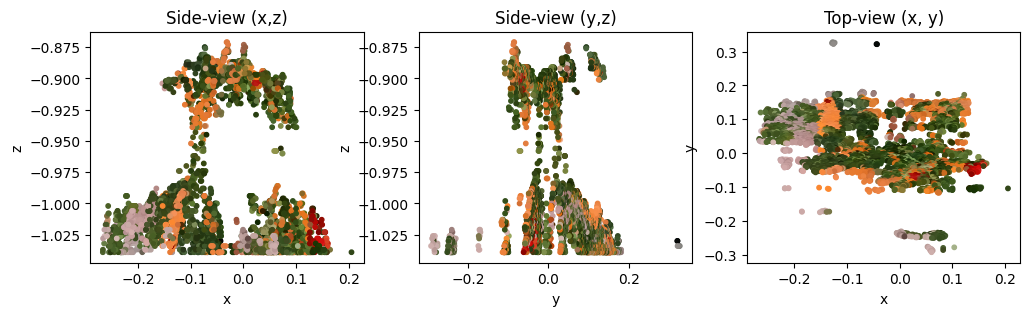

In [260]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x_ground_filtered, z_ground_filtered, c=c_ground_filtered, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')

axs[1].scatter(y_ground_filtered, z_ground_filtered, c=c_ground_filtered, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x_ground_filtered, y_ground_filtered, c=c_ground_filtered, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')

plt.show()

In [249]:
print(np.min(c))
print(np.max(c))
print(c)

0.0
1.0
[[0.58039216 0.57647059 0.60392157]
 [0.82352941 0.85490196 0.88235294]
 [0.62352941 0.62352941 0.64313725]
 ...
 [0.0627451  0.07058824 0.06666667]
 [0.         0.00392157 0.        ]
 [0.00392157 0.01960784 0.03529412]]


In [250]:
c_hsv = copy.deepcopy(c_ground_filtered)
c_rgb = copy.deepcopy(c_ground_filtered)


c_hsv[:, 0]= (c_hsv[:, 0] * 355)
c_hsv[:, 1]= (c_hsv[:, 1] * 100)
c_hsv[:, 2]= (c_hsv[:, 2] * 100)

c_rgb[:, 0]= (c_rgb[:, 0] * 255)
c_rgb[:, 1]= (c_rgb[:, 1] * 255)
c_rgb[:, 2]= (c_rgb[:, 2] * 255)

print(f"c original: {c}")
print("----------------------")

print(f"c_hsv: {c_hsv}")
print(f"c_hsv shape: {c_hsv.shape}")
print("----------------------")

print(f"c_rgb: {c_rgb}")
print(f"c_rgb shape: {c_rgb.shape}")




c original: [[0.58039216 0.57647059 0.60392157]
 [0.82352941 0.85490196 0.88235294]
 [0.62352941 0.62352941 0.64313725]
 ...
 [0.0627451  0.07058824 0.06666667]
 [0.         0.00392157 0.        ]
 [0.00392157 0.01960784 0.03529412]]
----------------------
c_hsv: [[157.31372549  43.92156863  42.35294118]
 [192.11764706  53.33333333  51.76470588]
 [185.15686275  51.76470588  49.80392157]
 ...
 [272.8627451   64.31372549  63.1372549 ]
 [268.68627451  63.52941176  62.35294118]
 [286.78431373  68.62745098  67.45098039]]
c_hsv shape: (5180, 3)
----------------------
c_rgb: [[113. 112. 108.]
 [138. 136. 132.]
 [133. 132. 127.]
 ...
 [196. 164. 161.]
 [193. 162. 159.]
 [206. 175. 172.]]
c_rgb shape: (5180, 3)


In [251]:
upper_green_hsv = np.array([180, 100, 100])
lower_green_hsv = np.array([90, 0, 0])

upper_green_rgb = np.array([50, 205, 50])
lower_green_rgb = np.array([0, 100, 0])

mask_green_low_hsv = copy.deepcopy((c_hsv > lower_green_hsv).all(axis=1))
mask_green_low_rgb = copy.deepcopy((c_rgb > lower_green_rgb).all(axis=1))

print(f"mask green low hsv: {mask_green_low_hsv}")
print(f"mask green low rgb: {mask_green_low_rgb}")

mask green low hsv: [ True  True  True ...  True  True  True]
mask green low rgb: [ True  True  True ...  True  True  True]


In [252]:
x_green_hsv = copy.deepcopy(x_ground_filtered[mask_green_low_hsv])
y_green_hsv = copy.deepcopy(y_ground_filtered[mask_green_low_hsv])
z_green_hsv = copy.deepcopy(z_ground_filtered[mask_green_low_hsv])
c_green_hsv = copy.deepcopy(c_ground_filtered[mask_green_low_hsv])

x_green_rgb = copy.deepcopy(x_ground_filtered[mask_green_low_rgb])
y_green_rgb = copy.deepcopy(y_ground_filtered[mask_green_low_rgb])
z_green_rgb = copy.deepcopy(z_ground_filtered[mask_green_low_rgb])
c_green_rgb = copy.deepcopy(c_ground_filtered[mask_green_low_rgb])

In [253]:
mask_green_up_hsv = (c_green_hsv < upper_green_hsv).all(axis=1)
mask_green_up_rgb = (c_green_rgb < upper_green_rgb).all(axis=1)

print(f"mask green up hsv: {mask_green_up_hsv}")
print(f"mask green up rgb: {mask_green_up_rgb}")

mask green up hsv: [ True  True  True ...  True  True  True]
mask green up rgb: [ True  True  True ...  True  True  True]


In [254]:
x_green_hsv = x_green_hsv[mask_green_up_hsv]
y_green_hsv = y_green_hsv[mask_green_up_hsv]
z_green_hsv = z_green_hsv[mask_green_up_hsv]
c_green_hsv = c_green_hsv[mask_green_up_hsv]

x_green_rgb = x_green_rgb[mask_green_up_rgb]
y_green_rgb = y_green_rgb[mask_green_up_rgb]
z_green_rgb = z_green_rgb[mask_green_up_rgb]
c_green_rgb = c_green_rgb[mask_green_up_rgb]

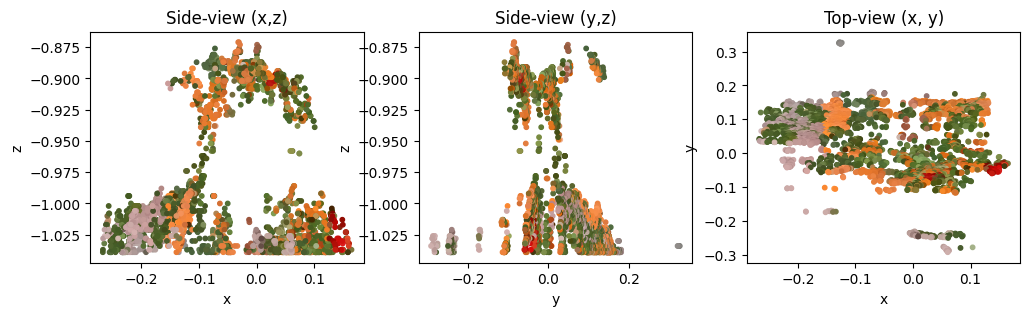

In [255]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x_green_hsv, z_green_hsv, c=c_green_hsv, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')

axs[1].scatter(y_green_hsv, z_green_hsv, c=c_green_hsv, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x_green_hsv, y_green_hsv, c=c_green_hsv, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')

plt.show()

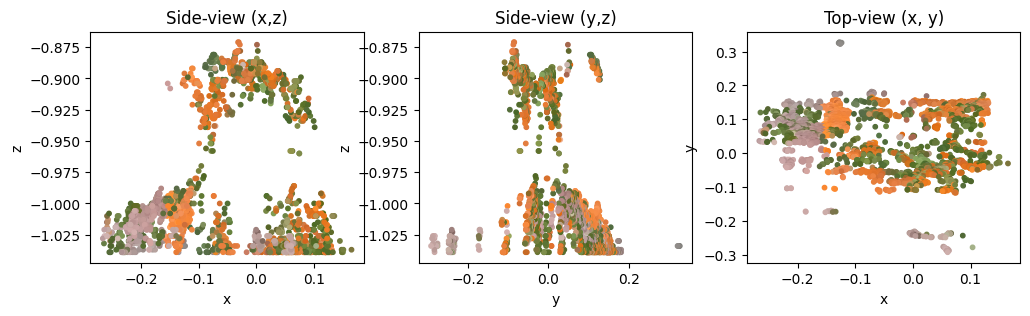

In [256]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 3))

axs[0].scatter(x_green_rgb, z_green_rgb, c=c_green_rgb, s=10)
axs[0].set_xlabel('x')
axs[0].set_ylabel('z')
axs[0].set_title('Side-view (x,z)')

axs[1].scatter(y_green_rgb, z_green_rgb, c=c_green_rgb, s=10)
axs[1].set_xlabel('y')
axs[1].set_ylabel('z')
axs[1].set_title('Side-view (y,z)')

axs[2].scatter(x_green_rgb, y_green_rgb, c=c_green_rgb, s=10)
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Top-view (x, y)')

plt.show()